In [20]:
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
from tabulate import tabulate


In [21]:
results_summary = pd.read_csv('ShinyData_clinical_story_evaluation.csv', index_col = 0)

In [22]:
results_summary_N30 = results_summary[np.logical_and(np.logical_and(results_summary['N'] == 30,
                                                                    results_summary['Data'] == 'prot'),
                                                     results_summary['Model'] == 'prevalent')]
results_summary_N30.index = range(len(results_summary_N30.index))

In [23]:
from IPython.display import display

GO_enrichemnt = list()
GO_enrichemnt_top5 = list()
for i in range(len(results_summary_N30)):
    print(results_summary_N30.loc[i]['Disease'])

    original_string = results_summary_N30['Features'][i]
    string_list = original_string[2:-2].split("', '")
    enr_KEEG = gp.enrichr(gene_list=string_list,
    gene_sets=['GO_Biological_Process_2023'],
    organism='Human').results
    
    summary = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][['Term', 'Adjusted P-value']]
    summary['disease'] = results_summary_N30.loc[i]['Disease']

    summary_top5 = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][:5][['Term', 'Adjusted P-value']]
    summary_top5['disease'] = results_summary_N30.loc[i]['Disease']
    
    GO_enrichemnt.append(summary)
    GO_enrichemnt_top5.append(summary_top5)

CD
UC
RA
PSO
SLE
COPD
obesity
T2D
Atherosclerosis


In [24]:
GO_enrichemnt_top5 = pd.concat(GO_enrichemnt_top5)
GO_enrichemnt = pd.concat(GO_enrichemnt)

In [25]:
GO_enrichemnt = GO_enrichemnt.replace('Atherosclerosis', 'ASVD')
GO_enrichemnt_top5 = GO_enrichemnt_top5.replace('Atherosclerosis', 'ASVD')

In [26]:
GO_enrichemnt_top5_wide = GO_enrichemnt_top5.pivot(index='Term', columns='disease', values='Adjusted P-value')

In [27]:
GO_enrichemnt_top5_wide = GO_enrichemnt_top5_wide.replace(np.nan, 1)

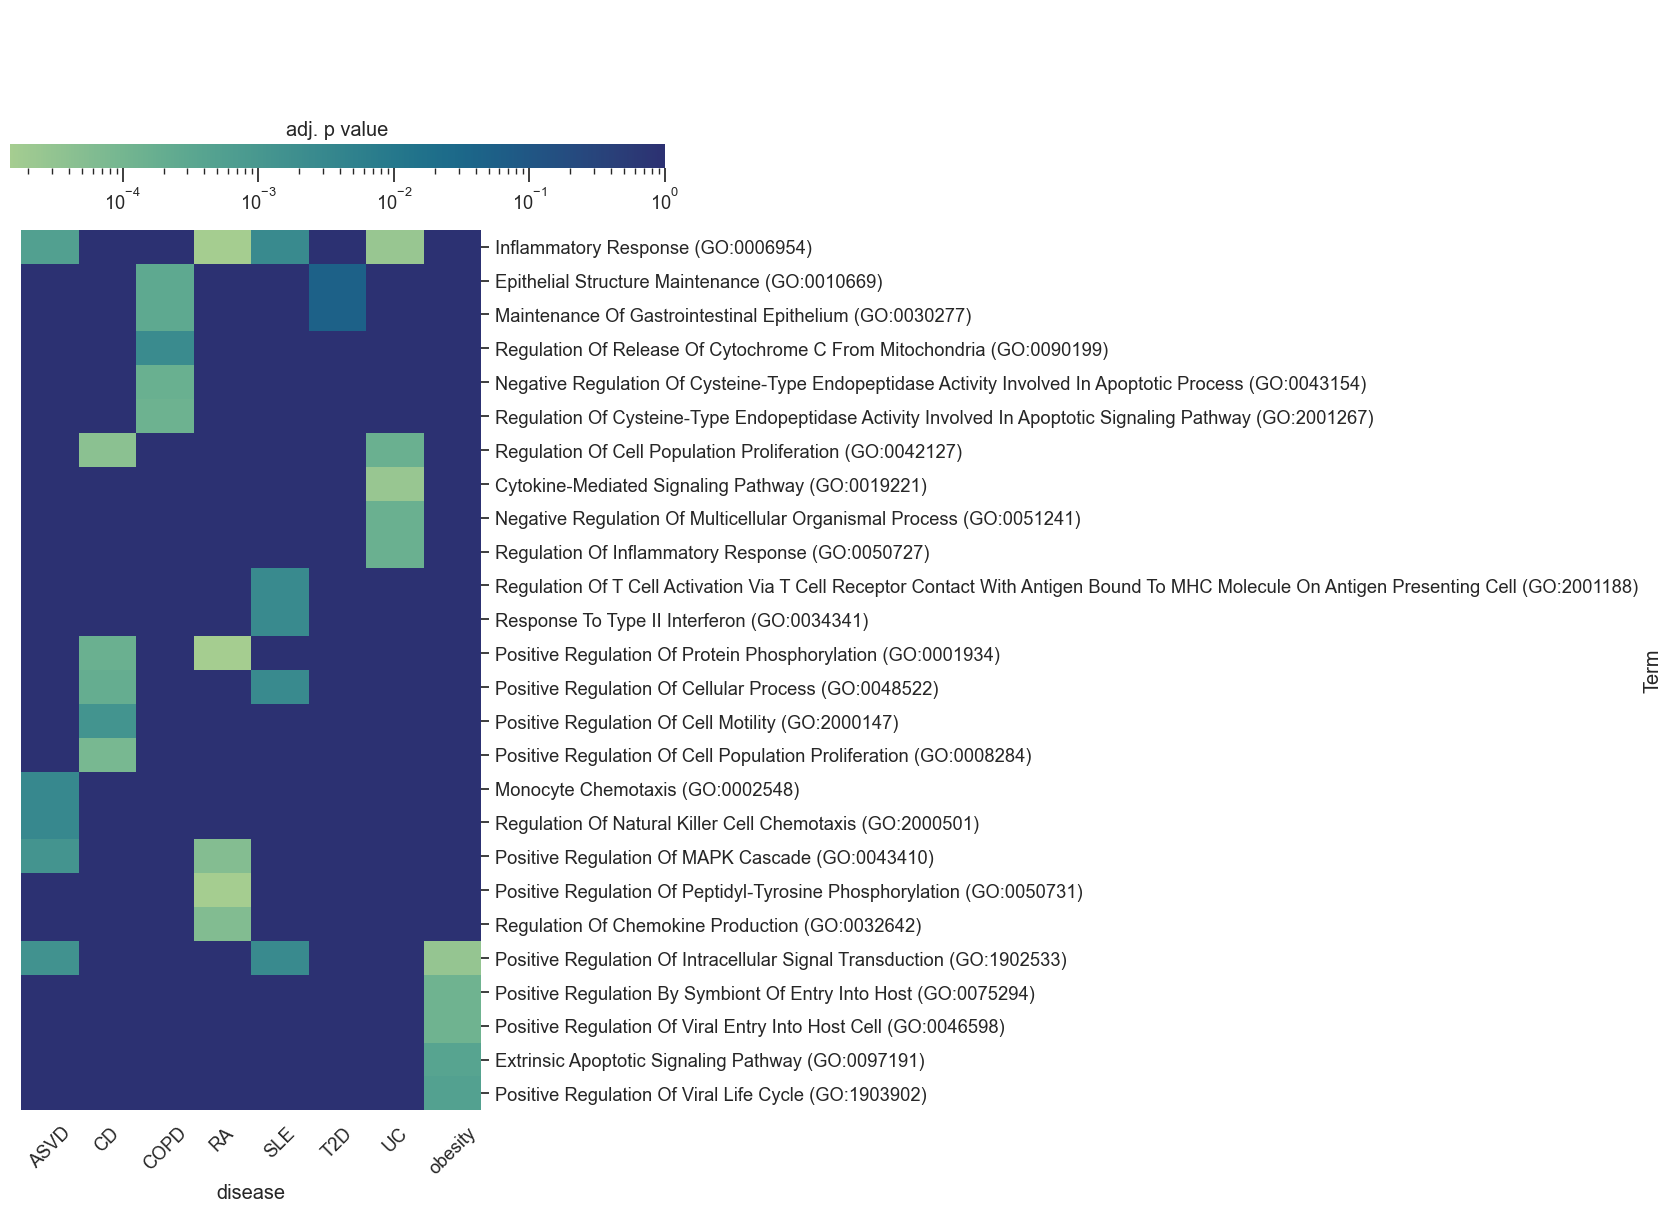

In [62]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.set(font_scale=1.2)
g = sns.clustermap(GO_enrichemnt_top5_wide, col_cluster = False, norm=LogNorm(), figsize = (18,12), cmap="crest",
                  cbar_kws={"orientation": "horizontal"})

x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0+0.05, 0.85, g.ax_row_dendrogram.get_position().width +0.3, 0.02])
g.ax_cbar.set_title('adj. p value')
g.ax_cbar.tick_params(axis='x', length=10)
for spine in g.ax_cbar.spines:
    g.ax_cbar.spines[spine].set_color('crimson')
    #g.ax_cbar.spines[spine].set_linewidth(2)
g.ax_row_dendrogram.set_visible(False)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45)
plt.savefig("Enrichemnt analysis.png")

In [13]:
GO_enrichemnt_wide = GO_enrichemnt.pivot(index='Term', columns='disease', values='Adjusted P-value')

In [ ]:
#GO_enrichemnt[['disease', 'Adjusted P-value', 'Term']].to_csv('GO_enrichment2.csv', index = False)

In [ ]:
human = gp.get_library_name(organism='human')
human